In [6]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
filepath = "D:\Kaggle\CustomerChurn"
filename = "WA_Fn-UseC_-Telco-Customer-Churn_clean.csv" 

df_churn = pd.read_csv(os.path.join(filepath, filename))
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [16]:
X = df_churn.drop('Churn',axis='columns')
y = df_churn['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(len(X.columns),)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5341 - accuracy: 0.7356 - val_loss: 0.4555 - val_accuracy: 0.7783
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.7806 - val_loss: 0.4458 - val_accuracy: 0.7882
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.7900 - val_loss: 0.4409 - val_accuracy: 0.7832
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.7989 - val_loss: 0.4385 - val_accuracy: 0.7797
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.7964 - val_loss: 0.4395 - val_accuracy: 0.7839
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7966 - val_loss: 0.4389 - val_accuracy: 0.7811
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.7996 - val_loss: 0.4380 - val_accuracy: 0.7811

Epoch 58/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8180 - val_loss: 0.4449 - val_accuracy: 0.7903
Epoch 59/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8235 - val_loss: 0.4441 - val_accuracy: 0.7861
Epoch 60/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8261 - val_loss: 0.4468 - val_accuracy: 0.7818
Epoch 61/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3904 - accuracy: 0.8260 - val_loss: 0.4493 - val_accuracy: 0.7854
Epoch 62/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8213 - val_loss: 0.4474 - val_accuracy: 0.7868
Epoch 63/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8240 - val_loss: 0.4447 - val_accuracy: 0.7861
Epoch 64/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3897 - accuracy: 0.8240 - val_loss: 0.4449 - val_accuracy:

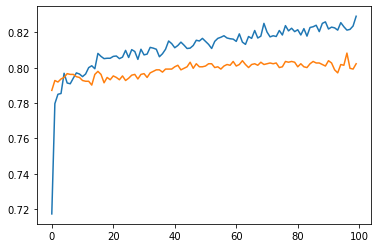

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [13]:
y_pred = model.predict(X_test)
y_pred[y_pred<0.5]=0
y_pred[y_pred>=0.5]=1

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)

array([[1554,  157],
       [ 302,  308]], dtype=int64)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1711
           1       0.66      0.50      0.57       610

    accuracy                           0.80      2321
   macro avg       0.75      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321

